# IMPORT LIBRARY

In [ ]:
!git clone https://github.com/iShohei220/adopt.git

# CLONE REPO GITHUB NÀY ĐỂ SỬ DỤNG ADOPT OPTIMIZER

Cloning into 'adopt'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 94 (delta 32), reused 55 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 464.65 KiB | 3.27 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [ ]:
!conda install pytorch torchvision torchaudio pytorch-cuda=12.4 -c pytorch -c nvidia --yes

# DÒNG NÀY TÔI SỬ DỤNG ĐỂ CÀI CÁC THƯ VIỆN CẦN THIẾT TRÊN KAGGLE ĐIỂN HÌNH LÀ PYTORCH 2.5.1
# VÌ ADOPT BẮT BUỘC PYTORCH > 2.5

# NẾU SỬ DỤNG GOOGLE COLAB THÌ CÓ THỂ BỎ QUA DÒNG NÀY 

Retrieving notices: ...working... done
Channels:
 - pytorch
 - nvidia
 - rapidsai
 - nodefaults
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pytorch
    - pytorch-cuda=12.4
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aws-c-auth-0.8.0           |      hb88c0a9_10         105 KB  conda-forge
    aws-c-cal-0.8.0            |       hecf86a2_2          46 KB  conda-forge
    aws-c-common-0.10.3        |       hb9d3cd8_0         232 KB  conda-forge
    aws-c-compression-0.3.0    |       hf42f96a_2          19 KB  conda-forge
    aws-c-event-stream-0.5.0   |       h1ffe551_7          52 KB  conda-forge
    aws-c-http-0.9.1           |       hab05fe4_2        

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [5]:
import torch
print(torch.__version__)
print("CUDA version from PyTorch:", torch.version.cuda)

2.5.1.post104
CUDA version from PyTorch: None


In [ ]:
import sys
sys.path.append('/kaggle/working/adopt')

from adopt import ADOPT

# DÒNG NÀY THÊM ĐƯỜNG DẪN /kaggle/working/adopt VÀO DANH SÁCH ĐƯỜNG DẪN MÀ PYTHON SỬ DỤNG ĐỂ TÌM KIẾM CÁC MODULE
# Ở TRÊN ĐANG APPEND MỘT DIRECTORY adopt TRÊN KAGGLE, adopt NẰM TRONG GITHUB REPO MÀ TA CLONE VỀ
# NẾU DÙNG GOOGLE COLAB THÌ SẼ LÀ sys.path.append('/content/adopt')


# ADOPT ALGORITHM
<img src="https://i.ibb.co/KNRCxTH/Screenshot-2024-12-03-012156.png">

In [7]:
from typing import Optional, Union, Tuple, List, cast, Callable
import torch
from torch.optim.optimizer import Optimizer, ParamsT

from torch import Tensor

from torch.optim.optimizer import (
    _capturable_doc,
    _default_to_fused_or_foreach,
    _device_dtype_check_for_fused,
    _differentiable_doc,
    _disable_dynamo_if_unsupported,
    _foreach_doc,
    _fused_doc,
    _get_capturable_supported_devices,
    _get_scalar_dtype,
    _get_value,
    _maximize_doc,
    _stack_if_compiling,
    _use_grad_for_differentiable,
    _view_as_real,
    DeviceDict,
    Optimizer,
    ParamsT,
)

__all__ = ["ADOPT_ALG1"]

class ADOPT_ALG1(Optimizer):
    def __init__(
        self,
        params: ParamsT,
        lr: Union[float, torch.Tensor] = 1e-3,
        betas: Tuple[float, float] = (0.9, 0.9999),
        eps: float = 1e-6,
        weight_decay: float = 0.0,
        *,
        foreach: Optional[bool] = None,
        maximize: bool = False,
        capturable: bool = False,
        differentiable: bool = False,
        fused: Optional[bool] = None,
        decouple: bool = False,  # Thêm tham số decouple
    ):
        # Kiểm tra giá trị của lr
        if isinstance(lr, torch.Tensor):
            if foreach and not capturable:
                raise ValueError(
                    "lr as a Tensor is not supported for capturable=False and foreach=True"
                )
            if lr.numel() != 1:
                raise ValueError("Tensor lr must be 1-element")

        if not 0.0 <= lr:
            raise ValueError(f"Invalid learning rate: {lr}")
        if not 0.0 <= eps:
            raise ValueError(f"Invalid epsilon value: {eps}")
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError(f"Invalid beta parameter at index 0: {betas[0]}")
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError(f"Invalid beta parameter at index 1: {betas[1]}")
        if not 0.0 <= weight_decay:
            raise ValueError(f"Invalid weight_decay value: {weight_decay}")

        defaults = dict(
            lr=lr,
            betas=betas,
            eps=eps,
            weight_decay=weight_decay,
            decouple=decouple,
            maximize=maximize,
            foreach=foreach,
            capturable=capturable,
            differentiable=differentiable,
            fused=fused,
        )
        super().__init__(params, defaults)

    def __setstate__(self, state):
        super().__setstate__(state)
        for group in self.param_groups:
            group.setdefault("maximize", False)
            group.setdefault("foreach", None)
            group.setdefault("capturable", False)
            group.setdefault("differentiable", False)
            fused = group.setdefault("fused", None)
            for p in group["params"]:
                p_state = self.state.get(p, [])
                if len(p_state) != 0 and not torch.is_tensor(p_state["step"]):
                    step_val = float(p_state["step"])
                    p_state["step"] = (
                        torch.tensor(
                            step_val,
                            dtype=_get_scalar_dtype(is_fused=fused),
                            device=p.device,
                        )
                        if group["capturable"] or group["fused"]
                        else torch.tensor(step_val, dtype=_get_scalar_dtype())
                    )

    def _init_group(
        self,
        group,
        params_with_grad,
        grads,
        exp_avgs,
        exp_avg_sqs,
        state_steps,
    ):
        has_complex = False
        for p in group["params"]:
            if p.grad is not None:
                has_complex |= torch.is_complex(p)
                params_with_grad.append(p)
                if p.grad.is_sparse:
                    raise RuntimeError(
                        "ADOPT does not support sparse gradients"
                    )
                grads.append(p.grad)

                state = self.state[p]
                # Lazy state initialization
                if len(state) == 0:
                    if group["fused"]:
                        _device_dtype_check_for_fused(p)
                    # note(crcrpar): [special device hosting for step]
                    # Deliberately host `step` on CPU if both capturable and fused are off.
                    # This is because kernel launches are costly on CUDA and XLA.
                    state["step"] = (
                        torch.zeros(
                            (),
                            dtype=_get_scalar_dtype(is_fused=group["fused"]),
                            device=p.device,
                        )
                        if group["capturable"] or group["fused"]
                        else torch.tensor(0.0, dtype=_get_scalar_dtype())
                    )
                    # Exponential moving average of gradient values
                    state["exp_avg"] = torch.zeros_like(
                        p, memory_format=torch.preserve_format
                    )
                    # Exponential moving average of squared gradient values
                    state["exp_avg_sq"] = torch.zeros_like(
                        p, memory_format=torch.preserve_format
                    )

                exp_avgs.append(state["exp_avg"])
                exp_avg_sqs.append(state["exp_avg_sq"])

                if group["differentiable"] and state["step"].requires_grad:
                    raise RuntimeError(
                        "`requires_grad` is not supported for `step` in differentiable mode"
                    )

                # Foreach without capturable does not support a tensor lr
                if (
                    group["foreach"]
                    and torch.is_tensor(group["lr"])
                    and not group["capturable"]
                ):
                    raise RuntimeError(
                        "lr as a Tensor is not supported for capturable=False and foreach=True"
                    )

                state_steps.append(state["step"])
        return has_complex

    @_use_grad_for_differentiable
    def step(self, closure=None):
        """Perform a single optimization step.

        Args:
            closure (Callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        self._cuda_graph_capture_health_check()

        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            params_with_grad: List[Tensor] = []
            grads: List[Tensor] = []
            exp_avgs: List[Tensor] = []
            exp_avg_sqs: List[Tensor] = []
            state_steps: List[Tensor] = []
            beta1, beta2 = group["betas"]

            has_complex = self._init_group(
                group,
                params_with_grad,
                grads,
                exp_avgs,
                exp_avg_sqs,
                state_steps,
            )

            adopt(
                params_with_grad,
                grads,
                exp_avgs,
                exp_avg_sqs,
                state_steps,
                has_complex=has_complex,
                beta1=beta1,
                beta2=beta2,
                lr=group["lr"],
                weight_decay=group["weight_decay"],
                decouple=group["decouple"],
                eps=group["eps"],
                maximize=group["maximize"],
                foreach=group["foreach"],
                capturable=group["capturable"],
                differentiable=group["differentiable"],
                fused=group["fused"],
                grad_scale=getattr(self, "grad_scale", None),
                found_inf=getattr(self, "found_inf", None),
            )

        return loss



def _single_tensor_adopt(
    params: List[Tensor],
    grads: List[Tensor],
    exp_avgs: List[Tensor],
    exp_avg_sqs: List[Tensor],
    state_steps: List[Tensor],
    grad_scale: Optional[Tensor],
    found_inf: Optional[Tensor],
    *,
    has_complex: bool,
    beta1: float,
    beta2: float,
    lr: Union[float, Tensor],
    weight_decay: float,
    decouple: bool,
    eps: float,
    maximize: bool,
    capturable: bool,
    differentiable: bool,
):
    assert grad_scale is None and found_inf is None

    if torch.jit.is_scripting():
        # this assert is due to JIT being dumb and not realizing that the ops below
        # have overloads to handle both float and Tensor lrs, so we just assert it's
        # a float since most people using JIT are using floats
        assert isinstance(lr, float)

    for i, param in enumerate(params):
        grad = grads[i] if not maximize else -grads[i]
        exp_avg = exp_avgs[i]
        exp_avg_sq = exp_avg_sqs[i]
        step_t = state_steps[i]

        # Ensure capturable and differentiable behavior
        if not torch._utils.is_compiling() and capturable:
            capturable_supported_devices = _get_capturable_supported_devices()
            assert (
                param.device.type == step_t.device.type
                and param.device.type in capturable_supported_devices
            ), f"If capturable=True, params and state_steps must be on supported devices: {capturable_supported_devices}."

        # Update step if capturable or differentiable
        step = step_t if capturable or differentiable else _get_value(step_t)

        if weight_decay != 0 and not decouple:
            grad = grad.add(param, alpha=weight_decay)

        # Handle complex numbers
        if torch.is_complex(param):
            grad = torch.view_as_real(grad)
            if exp_avg is not None:
                exp_avg = torch.view_as_real(exp_avg)
            if exp_avg_sq is not None:
                exp_avg_sq = torch.view_as_real(exp_avg_sq)
            param = torch.view_as_real(param)

        # Check if this is the first step for the parameter
        if step == 0:
            exp_avg_sq.addcmul_(grad, grad.conj())
            denom = torch.clamp(exp_avg_sq.sqrt(), eps)
            normed_grad = grad.div(denom)
            exp_avg.add(normed_grad)
            # Update the step
            step_t += 1
            continue

        # Check if this is the first step for the parameter
        if step == 0:
            exp_avg_sq.addcmul_(grad, grad.conj())
            # Update the step
            step_t += 1
            continue

        if weight_decay != 0 and decouple:
            param.add_(param, alpha=-lr*weight_decay)

        # Calculate the denominator using sqrt of exp_avg_sq
        denom = torch.clamp(exp_avg_sq.sqrt(), eps)

        # Normalize the gradient by the computed denominator
        normed_grad = grad.div(denom)

        # Compute the exponential moving average of the gradient
        exp_avg.lerp_(normed_grad, 1 - beta1)

        # Update the parameter using the learning rate and exponential average of gradient
        param.add_(exp_avg, alpha=-lr)

        # Update the squared gradient moving average
        exp_avg_sq.mul_(beta2).addcmul_(grad, grad.conj(), value=1 - beta2)

        # Update step
        step_t += 1


@_disable_dynamo_if_unsupported(single_tensor_fn=_single_tensor_adopt)
def adopt(
    params: List[Tensor],
    grads: List[Tensor],
    exp_avgs: List[Tensor],
    exp_avg_sqs: List[Tensor],
    state_steps: List[Tensor],
    foreach: Optional[bool] = None,
    capturable: bool = False,
    differentiable: bool = False,
    fused: Optional[bool] = None,
    grad_scale: Optional[Tensor] = None,
    found_inf: Optional[Tensor] = None,
    has_complex: bool = False,
    *,
    beta1: float,
    beta2: float,
    lr: Union[float, Tensor],
    weight_decay: float,
    decouple: bool,
    eps: float,
    maximize: bool,
):
    r"""Functional API that performs ADOPT algorithm computation.

    """
    # Respect when the user inputs False/True for foreach or fused. We only want to change
    # the default when neither have been user-specified. Note that we default to foreach
    # and pass False to use_fused. This is not a mistake--we want to give the fused impl
    # bake-in time before making it the default, even if it is typically faster.
    if fused is None and foreach is None:
        _, foreach = _default_to_fused_or_foreach(
            params, differentiable, use_fused=False
        )
        # Do not flip on foreach for the unsupported case where lr is a Tensor and capturable=False.
        if foreach and isinstance(lr, Tensor) and not capturable:
            foreach = False
    if fused is None:
        fused = False
    if foreach is None:
        foreach = False

    # this check is slow during compilation, so we skip it
    # if it's strictly needed we can add this check back in dynamo
    if not torch._utils.is_compiling() and not all(
        isinstance(t, torch.Tensor) for t in state_steps
    ):
        raise RuntimeError(
            "API has changed, `state_steps` argument must contain a list of singleton tensors"
        )

    if foreach and torch.jit.is_scripting():
        raise RuntimeError("torch.jit.script not supported with foreach optimizers")
    if fused and torch.jit.is_scripting():
        raise RuntimeError("torch.jit.script not supported with fused optimizers")

    # if fused and not torch.jit.is_scripting():
    #     func = _fused_adopt
    # elif foreach and not torch.jit.is_scripting():
    #     func = _multi_tensor_adopt
    # else:
    #     func = _single_tensor_adopt
    func = _single_tensor_adopt

    func(
        params,
        grads,
        exp_avgs,
        exp_avg_sqs,
        state_steps,
        has_complex=has_complex,
        beta1=beta1,
        beta2=beta2,
        lr=lr,
        weight_decay=weight_decay,
        decouple=decouple,
        eps=eps,
        maximize=maximize,
        capturable=capturable,
        differentiable=differentiable,
        grad_scale=grad_scale,
        found_inf=found_inf,
    )



# MNIST DATASET

In [8]:
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data (scaling the pixel values to the range [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("X_train shape : ", x_train.shape)
print("Y_train shape : ", y_train.shape)
print("X_val shape : ", x_val.shape)
print("Y_val shape : ", y_val.shape)
print("X_test shape : ", x_test.shape)
print("Y_test shape : ", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train shape :  (48000, 28, 28)
Y_train shape :  (48000,)
X_val shape :  (12000, 28, 28)
Y_val shape :  (12000,)
X_test shape :  (10000, 28, 28)
Y_test shape :  (10000,)


In [9]:
def transform_data(data, label, batch_size=48):
    # Chuyển dữ liệu từ NumPy array sang PyTorch tensor
    data = torch.from_numpy(data).float()  # Chuyển `data` sang tensor kiểu float32
    data = data.view(-1, 784)  # Làm phẳng nếu dữ liệu là ảnh 28x28
    label = torch.from_numpy(label).long()  # Chuyển `label` sang tensor kiểu long (cho CrossEntropyLoss)

    # Tạo TensorDataset và DataLoader
    _data = TensorDataset(data, label)
    data_loader = DataLoader(_data, batch_size=batch_size, shuffle=True)
    return data_loader

In [10]:
train_loader = transform_data(x_train, y_train)
test_loader = transform_data(x_test, y_test)
val_loader = transform_data(x_val, y_val)

In [11]:
# Hàm để in kích thước của data và label trong DataLoader
def print_loader_shapes(data_loader, loader_name):
    print(f"\n{loader_name}:")

    for batch_idx, (data, labels) in enumerate(data_loader):
        print(f"  Batch {batch_idx + 1}:")
        print(f"    Data shape: {data.shape}")   # Kích thước của dữ liệu
        print(f"    Labels shape: {labels.shape}")  # Kích thước của nhãn
        break  # Dừng sau batch đầu tiên (nếu chỉ cần kiểm tra một batch)

# In kích thước của từng DataLoader
print_loader_shapes(train_loader, "Train Loader")
print_loader_shapes(test_loader, "Test Loader")
print_loader_shapes(val_loader, "Validation Loader")


Train Loader:
  Batch 1:
    Data shape: torch.Size([48, 784])
    Labels shape: torch.Size([48])

Test Loader:
  Batch 1:
    Data shape: torch.Size([48, 784])
    Labels shape: torch.Size([48])

Validation Loader:
  Batch 1:
    Data shape: torch.Size([48, 784])
    Labels shape: torch.Size([48])


In [12]:
print(train_loader)

# ADASHIFT OPTIMIZER

In [13]:
class AdaShift(optim.Optimizer):
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), weight_decay=0):
        defaults = dict(lr=lr, betas=betas, weight_decay=weight_decay)
        super(AdaShift, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for param in group['params']:
                if param.grad is None:
                    continue

                grad = param.grad.data
                state = self.state[param]

                # Initialization
                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(param.data)
                    state['exp_avg_sq'] = torch.zeros_like(param.data)

                beta1, beta2 = group['betas']
                state['step'] += 1

                # Update biased first moment estimate
                state['exp_avg'] = beta1 * state['exp_avg'] + (1 - beta1) * grad

                # Update biased second raw moment estimate
                state['exp_avg_sq'] = beta2 * state['exp_avg_sq'] + (1 - beta2) * grad.pow(2)

                # Bias correction
                exp_avg = state['exp_avg'] / (1 - beta1 ** state['step'])
                exp_avg_sq = state['exp_avg_sq'] / (1 - beta2 ** state['step'])

                # Update parameter
                denom = exp_avg_sq.sqrt().add_(1e-8)  # Use AdaShift's denominator
                param.data.addcdiv_(-group['lr'], exp_avg, denom)

                # Apply weight decay
                if group['weight_decay'] != 0:
                    param.data.add_(-group['lr'], group['weight_decay'] * param.data)

        return loss

# MODEL

In [ ]:
import torch
import torch.nn as nn
import numpy as np

class SimpleModel(nn.Module):
    def __init__(self, input_size=784, num_classes=10):
        super(SimpleModel, self).__init__()

        self.fc_layers = nn.Sequential(
            nn.Linear(input_size, 784),
            nn.ReLU(),
            nn.Linear(784, num_classes)
        )
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        x = self.fc_layers(x)
        return x

    def fit(self, num_epochs, base_lr, optimizer_type, train_loader, val_loader, weight_decay=0.0001, verbose=True):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)

        history = {
            'step_loss': [],
            'step_accuracy': [],
            'step_val_accuracy': [],
            'epoch_loss': [],
            'epoch_accuracy': [],
            'val_accuracy': []
        }



        if optimizer_type == "adam":
            optimizer = torch.optim.Adam(self.parameters(), lr=base_lr, weight_decay=weight_decay)
        elif optimizer_type == "amsgrad":
            optimizer = torch.optim.Adam(self.parameters(), lr=base_lr, weight_decay=weight_decay, amsgrad=True)
        elif optimizer_type == "adopt":
            optimizer = ADOPT_ALG1(self.parameters(), lr=base_lr, weight_decay=weight_decay)
        elif optimizer_type == "adashift":
            optimizer = AdaShift(self.parameters(), lr=base_lr, weight_decay=weight_decay)


        iteration = 0
        for epoch in range(num_epochs):
            self.train()
            running_loss = 0.0
            correct_train = 0
            total_train = 0

            for i, (inputs, labels) in enumerate(train_loader):
                inputs, labels = inputs.to(device), labels.to(device)
                iteration += 1

                lr = base_lr / (iteration ** 0.5)
                for param_group in optimizer.param_groups:
                    param_group['lr'] = lr

                # Forward, backward và tối ưu hóa
                optimizer.zero_grad()
                outputs = self(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                # Tính toán loss và accuracy
                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()

                # Lưu lịch sử từng bước
                step_loss = loss.item()
                step_accuracy = correct_train / total_train
                history['step_loss'].append(step_loss)
                history['step_accuracy'].append(step_accuracy)


                step_val_accuracy = self._evaluate(val_loader, device)
                history['step_val_accuracy'].append(step_val_accuracy)

                if verbose and (i % 100 == 0):
                    print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], "
                          f"Loss: {step_loss:.6f}, Train Accuracy: {step_accuracy:.6f}, Val Accuracy: {step_val_accuracy:.6f}")



            # Tổng hợp kết quả epoch
            epoch_loss = running_loss / len(train_loader)
            epoch_accuracy = correct_train / total_train
            history['epoch_loss'].append(epoch_loss)
            history['epoch_accuracy'].append(epoch_accuracy)

            # Đánh giá trên toàn bộ validation set
            val_accuracy = self._evaluate(val_loader, device)
            history['val_accuracy'].append(val_accuracy)

            if verbose:
                print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.6f}, "
                      f"Train Accuracy: {epoch_accuracy:.6f}, Validation Accuracy: {val_accuracy:.6f}")

        return history

    def predict(self, test_loader):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)

        self.eval()
        predictions = []

        with torch.no_grad():
            for inputs, _ in test_loader:
                inputs = inputs.to(device)
                inputs = inputs.view(inputs.size(0), -1)  # Flatten nếu cần
                outputs = self(inputs)
                _, predicted = torch.max(outputs, 1)
                predictions.extend(predicted.cpu().numpy())

        return np.array(predictions)

    def evaluate(self, test_loader):
        """
        Tính độ chính xác (accuracy) trên tập test.
        """
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)

        accuracy = self._evaluate(test_loader, device)
        print(f"Test Accuracy: {accuracy:.2f}%")
        return accuracy

    def _evaluate(self, data_loader, device):
        """
        Hàm hỗ trợ tính độ chính xác cho cả validation và test.
        """
        self.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in data_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                inputs = inputs.view(inputs.size(0), -1)  # Flatten nếu cần
                outputs = self(inputs)
                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        return correct / total
model = SimpleModel()


In [15]:
print(model)

SimpleCNN(
  (fc_layers): Sequential(
    (0): Linear(in_features=784, out_features=784, bias=True)
    (1): ReLU()
    (2): Linear(in_features=784, out_features=10, bias=True)
  )
  (criterion): CrossEntropyLoss()
)


In [16]:
print(model.parameters())

<generator object Module.parameters at 0x78d8f7022880>


In [17]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]}")  # Hiển thị 2 giá trị đầu tiên cho gọn

Layer: fc_layers.0.weight | Size: torch.Size([784, 784]) | Values : tensor([[ 0.0045, -0.0322, -0.0347,  ..., -0.0164,  0.0189,  0.0086],
        [-0.0111,  0.0187,  0.0160,  ...,  0.0323,  0.0038, -0.0076]],
       grad_fn=<SliceBackward0>)
Layer: fc_layers.0.bias | Size: torch.Size([784]) | Values : tensor([0.0057, 0.0120], grad_fn=<SliceBackward0>)
Layer: fc_layers.2.weight | Size: torch.Size([10, 784]) | Values : tensor([[-0.0098,  0.0125, -0.0127,  ..., -0.0163,  0.0200,  0.0342],
        [-0.0066,  0.0265, -0.0209,  ...,  0.0063, -0.0162,  0.0298]],
       grad_fn=<SliceBackward0>)
Layer: fc_layers.2.bias | Size: torch.Size([10]) | Values : tensor([-0.0311, -0.0103], grad_fn=<SliceBackward0>)


In [ ]:
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

list_optimizer = ["adopt","adam", "amsgrad", "adashift"]
results = {}
lr = 0.001

for optimizer_train in list_optimizer:
    model = SimpleModel(num_classes=10)
    history = model.fit(
        num_epochs=10,
        base_lr=lr,
        optimizer_type=optimizer_train,
        train_loader=train_loader,
        val_loader=val_loader,
        verbose=True
    )
    # Lưu dữ liệu train_accuracy và val_accuracy
    results[optimizer_train] = {
        "step_accuracy": history["step_accuracy"],
        "step_val_accuracy": history["step_val_accuracy"]
    }

Epoch [1/10], Step [1/1000], Loss: 2.309650, Train Accuracy: 0.062500, Val Accuracy: 0.097500
Epoch [1/10], Step [101/1000], Loss: 0.372765, Train Accuracy: 0.787748, Val Accuracy: 0.894833
Epoch [1/10], Step [201/1000], Loss: 0.321556, Train Accuracy: 0.842765, Val Accuracy: 0.911750
Epoch [1/10], Step [301/1000], Loss: 0.266903, Train Accuracy: 0.862265, Val Accuracy: 0.917083
Epoch [1/10], Step [401/1000], Loss: 0.454605, Train Accuracy: 0.874169, Val Accuracy: 0.922500
Epoch [1/10], Step [501/1000], Loss: 0.289317, Train Accuracy: 0.883899, Val Accuracy: 0.922000
Epoch [1/10], Step [601/1000], Loss: 0.367139, Train Accuracy: 0.889940, Val Accuracy: 0.925750
Epoch [1/10], Step [701/1000], Loss: 0.166683, Train Accuracy: 0.894437, Val Accuracy: 0.928417
Epoch [1/10], Step [801/1000], Loss: 0.261524, Train Accuracy: 0.898538, Val Accuracy: 0.930167
Epoch [1/10], Step [901/1000], Loss: 0.299108, Train Accuracy: 0.901730, Val Accuracy: 0.932250
Epoch 1/10, Loss: 0.333308, Train Accuracy

/tmp/ipykernel_23/76994851.py:40: UserWarning: This overload of addcdiv_ is deprecated:
	addcdiv_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcdiv_(Tensor tensor1, Tensor tensor2, *, Number value = 1) (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1732841644249/work/torch/csrc/utils/python_arg_parser.cpp:1642.)
  param.data.addcdiv_(-group['lr'], exp_avg, denom)


Epoch [1/10], Step [1/1000], Loss: 2.297974, Train Accuracy: 0.145833, Val Accuracy: 0.239417
Epoch [1/10], Step [101/1000], Loss: 0.811861, Train Accuracy: 0.748969, Val Accuracy: 0.833833
Epoch [1/10], Step [201/1000], Loss: 0.903777, Train Accuracy: 0.797160, Val Accuracy: 0.858167
Epoch [1/10], Step [301/1000], Loss: 0.437456, Train Accuracy: 0.821498, Val Accuracy: 0.878167
Epoch [1/10], Step [401/1000], Loss: 0.498143, Train Accuracy: 0.836814, Val Accuracy: 0.884250
Epoch [1/10], Step [501/1000], Loss: 0.584870, Train Accuracy: 0.845476, Val Accuracy: 0.889833
Epoch [1/10], Step [601/1000], Loss: 0.416116, Train Accuracy: 0.853820, Val Accuracy: 0.892750
Epoch [1/10], Step [701/1000], Loss: 0.342799, Train Accuracy: 0.859754, Val Accuracy: 0.894000
Epoch [1/10], Step [801/1000], Loss: 0.565439, Train Accuracy: 0.863972, Val Accuracy: 0.899917
Epoch [1/10], Step [901/1000], Loss: 0.292279, Train Accuracy: 0.867740, Val Accuracy: 0.902583
Epoch 1/10, Loss: 0.541566, Train Accuracy

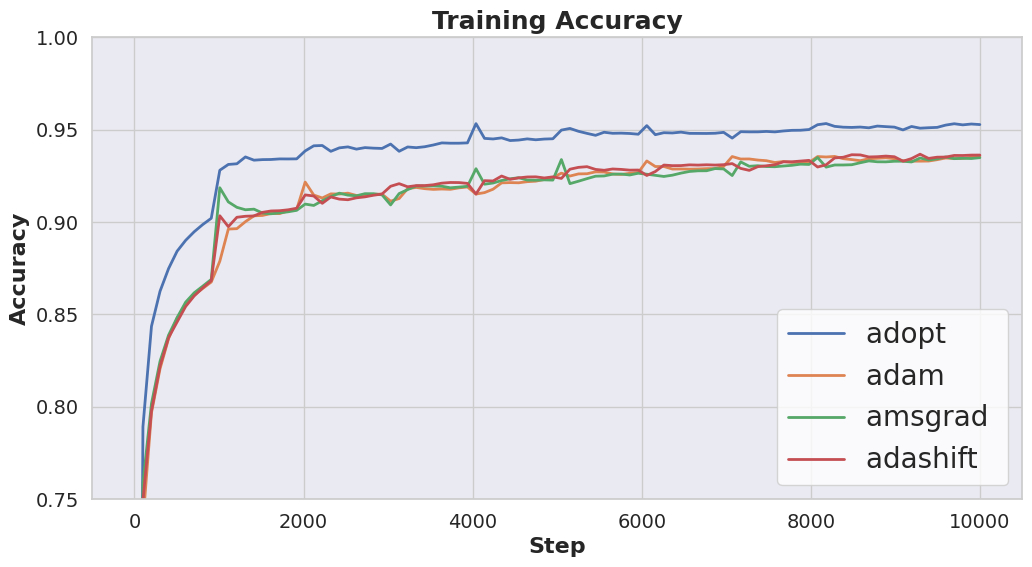

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def smooth_curve(x, y, num_points=100):
    x_new = np.linspace(x.min(), x.max(), num_points)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_new)
    return x_new, y_smooth

plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor('#EAEAF2')
for optimizer in list_optimizer:
    num_step = np.arange(len(results[optimizer]["step_accuracy"]))
    step_accuracy = np.array(results[optimizer]["step_accuracy"])

    step_smooth, accuracy_smooth = smooth_curve(num_step, step_accuracy)

    plt.plot(step_smooth, accuracy_smooth, label=f'{optimizer} ', linewidth=2)

plt.title('Training Accuracy',fontsize=18, fontweight='bold')
plt.xlabel('Step', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc='lower right', fontsize=20)
plt.grid(True)
plt.ylim(0.75, 1)
plt.show()



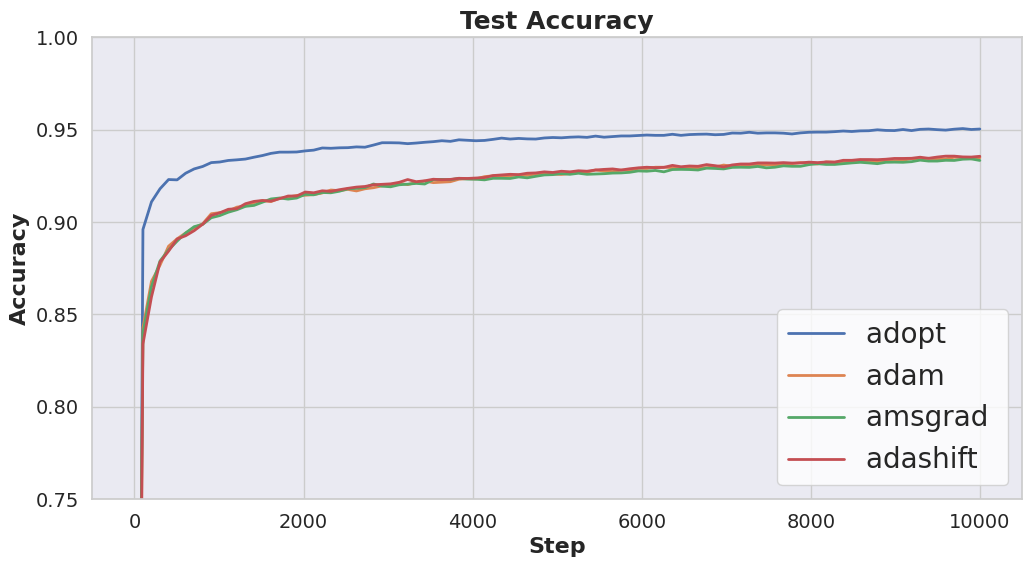

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def smooth_curve(x, y, num_points=100):
    x_new = np.linspace(x.min(), x.max(), num_points)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_new)
    return x_new, y_smooth

plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor('#EAEAF2')
for optimizer in list_optimizer:
    num_step = np.arange(len(results[optimizer]["step_val_accuracy"]))
    step_accuracy = np.array(results[optimizer]["step_val_accuracy"])

    step_smooth, accuracy_smooth = smooth_curve(num_step, step_accuracy)

    plt.plot(step_smooth, accuracy_smooth, label=f'{optimizer} ', linewidth=2)

plt.title('Test Accuracy',fontsize=18, fontweight='bold')
plt.xlabel('Step', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc='lower right', fontsize=20)
plt.grid(True)
plt.ylim(0.75, 1)
plt.show()